# Speech Emotion Recognition Using Deep Learning

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


####Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import IPython as ipd
import librosa
import librosa.display
import IPython.display as ipd  #to play audio signal
from IPython.display import Audio
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout


####Loading Ravdess Dataset

In [5]:
ravdess = "/content/drive/MyDrive/RAVDESS"
ravdess_directory_list = os.listdir(ravdess)
print(sorted(ravdess_directory_list))

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [6]:
paths=[]
labels=[]
# Walk through the directory and collect file paths and labels
for dirname, _, filenames in os.walk('/content/drive/MyDrive/RAVDESS'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        # Extract emotion label from the file name
        label = filename.split('-')[2].split('.')[0]  # Extract emotion code
        labels.append(label)
print('Ravdess is loaded')

Ravdess is loaded


In [7]:
len(paths)

1440

In [8]:
paths[:5]

['/content/drive/MyDrive/RAVDESS/Actor_21/03-01-01-01-02-01-21.wav',
 '/content/drive/MyDrive/RAVDESS/Actor_21/03-01-02-01-01-02-21.wav',
 '/content/drive/MyDrive/RAVDESS/Actor_21/03-01-02-02-02-01-21.wav',
 '/content/drive/MyDrive/RAVDESS/Actor_21/03-01-02-01-01-01-21.wav',
 '/content/drive/MyDrive/RAVDESS/Actor_21/03-01-03-01-01-02-21.wav']

In [9]:
labels[:5]

['01', '02', '02', '02', '03']

In [10]:
import pandas as pd
Rav_df=pd.DataFrame()
Rav_df['Speech']=paths
Rav_df['Label']=labels
Rav_df.head()

,Speech,Label
0,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,01
1,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,02
2,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,02
3,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,02
4,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,03


In [11]:
dct = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fear', '07': 'disgust', '08': 'surprise'}
# Replace label values with corresponding emotions
Rav_df['Label'] = Rav_df['Label'].replace(dct)
Rav_df.head()

,Speech,Label
0,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,neutral
1,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,calm
2,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,calm
3,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,calm
4,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,happy


#####Filtering out rows with 'calm, surprise,neutral' emotions,  removing from dataframe & resetting the index of dataframe

In [12]:
Rav_df = Rav_df[Rav_df['Label'] != 'calm']
Rav_df = Rav_df.drop(Rav_df[Rav_df['Label'] == 'calm'].index)
Rav_df.reset_index(drop=True, inplace=True)
Rav_df.head()

,Speech,Label
0,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,neutral
1,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,happy
2,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,neutral
3,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,neutral
4,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...,happy


In [13]:
Rav_df.shape

(1248, 2)

In [14]:
Rav_df['Label'].value_counts()

Label
happy       192
angry       192
sad         192
fear        192
surprise    192
disgust     192
neutral      96
Name: count, dtype: int64

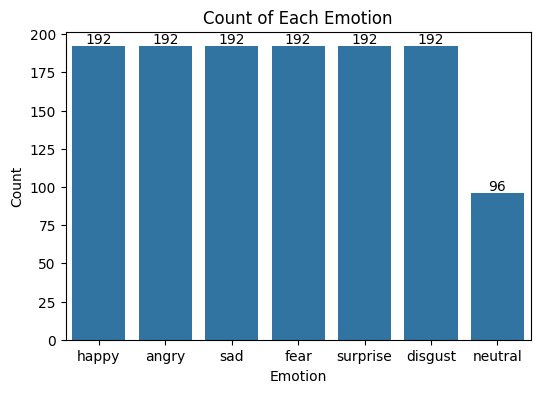

In [15]:
# Count the occurrences of each emotion
emotion_counts = Rav_df['Label'].value_counts()
plt.figure(figsize=(6,4))
ax = sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
for i, count in enumerate(emotion_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Count of Each Emotion')
plt.show()

In [16]:
print(Rav_df['Label'].unique())

['neutral' 'happy' 'angry' 'sad' 'fear' 'surprise' 'disgust']


In [17]:
paths=[]
labels=[]
for dirname,_,filenames in os.walk('/content/drive/MyDrive/TESS'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    #print(filename)
    label=filename.split('_')[-1]
    #print(label)
    label=label.split('.')[0]
    labels.append(label.lower())
print('TESS is loaded')

TESS is loaded


In [18]:
len(paths)

2800

In [19]:
paths[:5]

['/content/drive/MyDrive/TESS/OAF_Pleasant_surprise/OAF_back_ps.wav',
 '/content/drive/MyDrive/TESS/OAF_Pleasant_surprise/OAF_base_ps.wav',
 '/content/drive/MyDrive/TESS/OAF_Pleasant_surprise/OAF_bar_ps.wav',
 '/content/drive/MyDrive/TESS/OAF_Pleasant_surprise/OAF_bath_ps.wav',
 '/content/drive/MyDrive/TESS/OAF_Pleasant_surprise/OAF_cab_ps.wav']

In [20]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [21]:
import pandas as pd
Tess_df=pd.DataFrame()
Tess_df['Speech']=paths
Tess_df['Label']=labels
Tess_df.head()

,Speech,Label
0,/content/drive/MyDrive/TESS/OAF_Pleasant_surpr...,ps
1,/content/drive/MyDrive/TESS/OAF_Pleasant_surpr...,ps
2,/content/drive/MyDrive/TESS/OAF_Pleasant_surpr...,ps
3,/content/drive/MyDrive/TESS/OAF_Pleasant_surpr...,ps
4,/content/drive/MyDrive/TESS/OAF_Pleasant_surpr...,ps


In [22]:
Tess_df['Label'].unique()

array(['ps', 'fear', 'disgust', 'neutral', 'happy', 'sad', 'angry'],
      dtype=object)

In [23]:
# Replace 'ps' with 'surprise' in the 'Label' column
Tess_df['Label'] = Tess_df['Label'].replace('ps', 'surprise')
print(Tess_df.head())

                                              Speech     Label
0  /content/drive/MyDrive/TESS/OAF_Pleasant_surpr...  surprise
1  /content/drive/MyDrive/TESS/OAF_Pleasant_surpr...  surprise
2  /content/drive/MyDrive/TESS/OAF_Pleasant_surpr...  surprise
3  /content/drive/MyDrive/TESS/OAF_Pleasant_surpr...  surprise
4  /content/drive/MyDrive/TESS/OAF_Pleasant_surpr...  surprise


In [24]:
Tess_df.shape

(2800, 2)

#####Filter out and remove 'surprise, neutral' emotion from the dataframe and reset the index

In [25]:
'''Tess_df = Tess_df[Tess_df['Label'] != 'surprise']
Tess_df = Tess_df.drop(Tess_df[Tess_df['Label'] == 'surprise'].index)
Tess_df = Tess_df[Tess_df['Label'] != 'neutral']
Tess_df = Tess_df.drop(Tess_df[Tess_df['Label'] == 'neutral'].index)
Tess_df.reset_index(drop=True, inplace=True)
Tess_df.head()'''

"Tess_df = Tess_df[Tess_df['Label'] != 'surprise']\nTess_df = Tess_df.drop(Tess_df[Tess_df['Label'] == 'surprise'].index)\nTess_df = Tess_df[Tess_df['Label'] != 'neutral']\nTess_df = Tess_df.drop(Tess_df[Tess_df['Label'] == 'neutral'].index)\nTess_df.reset_index(drop=True, inplace=True)\nTess_df.head()"

In [26]:
Tess_df.Label.value_counts()

Label
surprise    400
fear        400
disgust     400
neutral     400
happy       400
sad         400
angry       400
Name: count, dtype: int64

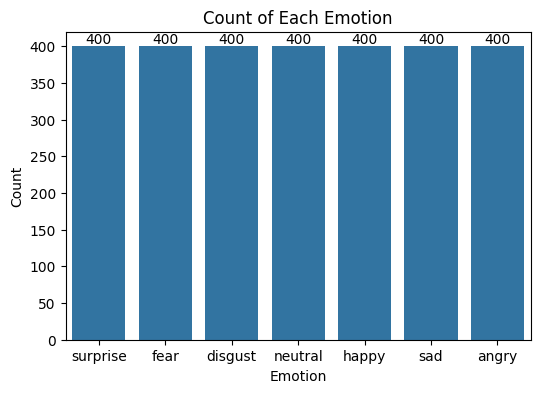

In [27]:
# Count the occurrences of each emotion
emotion_counts = Tess_df['Label'].value_counts()
plt.figure(figsize=(6,4))
ax = sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
for i, count in enumerate(emotion_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Count of Each Emotion')
plt.show()

In [28]:
print(Tess_df['Label'].unique())

['surprise' 'fear' 'disgust' 'neutral' 'happy' 'sad' 'angry']


In [29]:
Tess_df.Label.value_counts()

Label
surprise    400
fear        400
disgust     400
neutral     400
happy       400
sad         400
angry       400
Name: count, dtype: int64

In [30]:
Savee = "/content/drive/MyDrive/SAVEE"

In [31]:
# savee_directory_list = os.listdir(Savee)
# file_emotion = []
# file_path = []
# for file in savee_directory_list:
#     file_path.append(Savee +'/'+ file)
#     part = file.split('_')[1]
#     ele = part[:-6]
#     if ele=='a':
#         file_emotion.append('angry')
#     elif ele=='d':
#         file_emotion.append('disgust')
#     elif ele=='f':
#         file_emotion.append('fear')
#     elif ele=='h':
#         file_emotion.append('happy')
#     elif ele=='n':
#         file_emotion.append('neutral')
#     elif ele=='sa':
#         file_emotion.append('sad')
#     else:
#         file_emotion.append('surprise')
# # dataframe for emotion of files
# emotion_df = pd.DataFrame(file_emotion, columns=['Label'])
# # dataframe for path of files.
# path_df = pd.DataFrame(file_path, columns=['Speech'])
# Savee_df = pd.concat([emotion_df, path_df], axis=1)

In [32]:
paths=[]
labels=[]
for dirname,_,filenames in os.walk('/content/drive/MyDrive/SAVEE'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label=filename.split('.')[0][:-2]
    labels.append(label.lower())

In [33]:
Savee_df=pd.DataFrame()
Savee_df['Speech']=paths
Savee_df['Label']=labels
Savee_df.head()

,Speech,Label
0,/content/drive/MyDrive/SAVEE/JE/a01.wav,a
1,/content/drive/MyDrive/SAVEE/JE/a02.wav,a
2,/content/drive/MyDrive/SAVEE/JE/a03.wav,a
3,/content/drive/MyDrive/SAVEE/JE/a04.wav,a
4,/content/drive/MyDrive/SAVEE/JE/a05.wav,a


In [34]:
dct = {'n': 'neutral', 'h': 'happy', 'sa': 'sad', 'a': 'angry', 'f': 'fear', 'd': 'disgust', 'su': 'surprise'}

# Replace label values with corresponding emotions
Savee_df['Label'] = Savee_df['Label'].replace(dct)


Savee_df.head()

,Speech,Label
0,/content/drive/MyDrive/SAVEE/JE/a01.wav,angry
1,/content/drive/MyDrive/SAVEE/JE/a02.wav,angry
2,/content/drive/MyDrive/SAVEE/JE/a03.wav,angry
3,/content/drive/MyDrive/SAVEE/JE/a04.wav,angry
4,/content/drive/MyDrive/SAVEE/JE/a05.wav,angry


In [35]:
Savee_df.shape

(480, 2)

In [36]:
Savee_df.head()

,Speech,Label
0,/content/drive/MyDrive/SAVEE/JE/a01.wav,angry
1,/content/drive/MyDrive/SAVEE/JE/a02.wav,angry
2,/content/drive/MyDrive/SAVEE/JE/a03.wav,angry
3,/content/drive/MyDrive/SAVEE/JE/a04.wav,angry
4,/content/drive/MyDrive/SAVEE/JE/a05.wav,angry


In [37]:
Savee_df['Label'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'sad', 'neutral', 'surprise'],
      dtype=object)

#####Filter out and remove 'surprise, neutral' emotion from the dataframe and reset the index

In [38]:
'''Savee_df = Savee_df[Savee_df['Label'] != 'surprise']
Savee_df = Savee_df.drop(Savee_df[Savee_df['Label'] == 'surprise'].index)
Savee_df = Savee_df[Savee_df['Label'] != 'neutral']
Savee_df = Savee_df.drop(Savee_df[Savee_df['Label'] == 'neutral'].index)
Savee_df.reset_index(drop=True, inplace=True)
Savee_df.head()'''

"Savee_df = Savee_df[Savee_df['Label'] != 'surprise']\nSavee_df = Savee_df.drop(Savee_df[Savee_df['Label'] == 'surprise'].index)\nSavee_df = Savee_df[Savee_df['Label'] != 'neutral']\nSavee_df = Savee_df.drop(Savee_df[Savee_df['Label'] == 'neutral'].index)\nSavee_df.reset_index(drop=True, inplace=True)\nSavee_df.head()"

In [39]:
print(Savee_df.Label.value_counts())

Label
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64


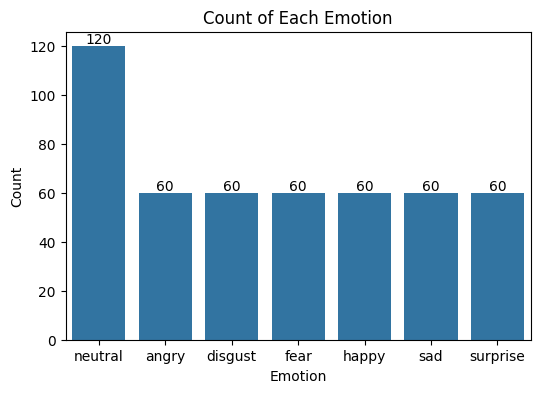

In [40]:
# Count the occurrences of each emotion
emotion_counts = Savee_df['Label'].value_counts()
plt.figure(figsize=(6,4))
ax = sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
for i, count in enumerate(emotion_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Count of Each Emotion')
plt.show()

In [41]:
print(Savee_df.Label.unique())

['angry' 'disgust' 'fear' 'happy' 'sad' 'neutral' 'surprise']


In [42]:
len(Savee_df)

480

####Combining all the dataframes into single dataframe 'df'

In [43]:
df = pd.concat([Tess_df, Rav_df, Savee_df], ignore_index=True)
df.head()

,Speech,Label
0,/content/drive/MyDrive/TESS/OAF_Pleasant_surpr...,surprise
1,/content/drive/MyDrive/TESS/OAF_Pleasant_surpr...,surprise
2,/content/drive/MyDrive/TESS/OAF_Pleasant_surpr...,surprise
3,/content/drive/MyDrive/TESS/OAF_Pleasant_surpr...,surprise
4,/content/drive/MyDrive/TESS/OAF_Pleasant_surpr...,surprise


In [44]:
len(df)

4528

In [45]:
df['Label'].value_counts()

Label
surprise    652
fear        652
disgust     652
happy       652
sad         652
angry       652
neutral     616
Name: count, dtype: int64

In [46]:
df.shape

(4528, 2)

####Two functions 'waveform' & 'spectogram' are designed for audio visualization for understanding the characteristics of the audio in the context of emotions using the librosa library in Python

In [47]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

**For Emotion = 'Happy'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

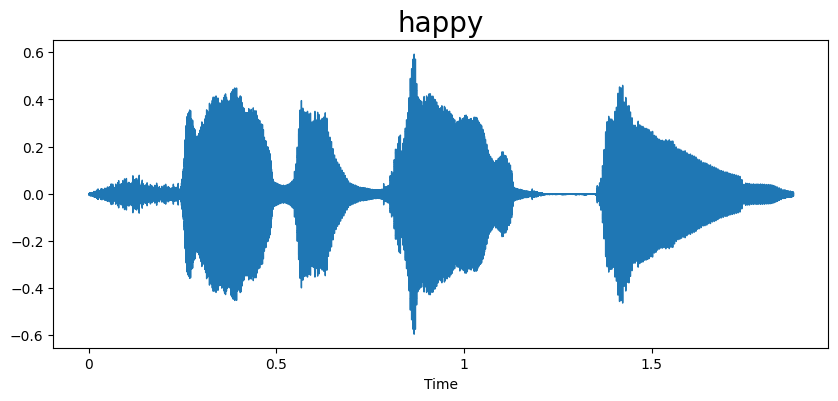

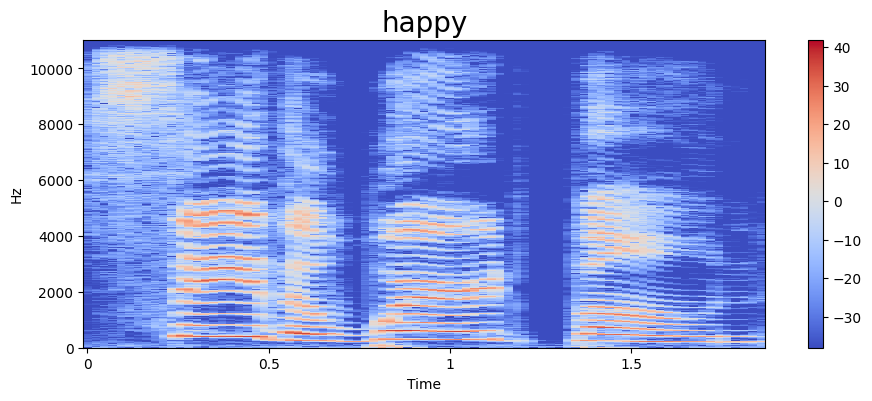

In [48]:
import numpy as np
emotion = 'happy'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**For Emotion = 'Angry'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

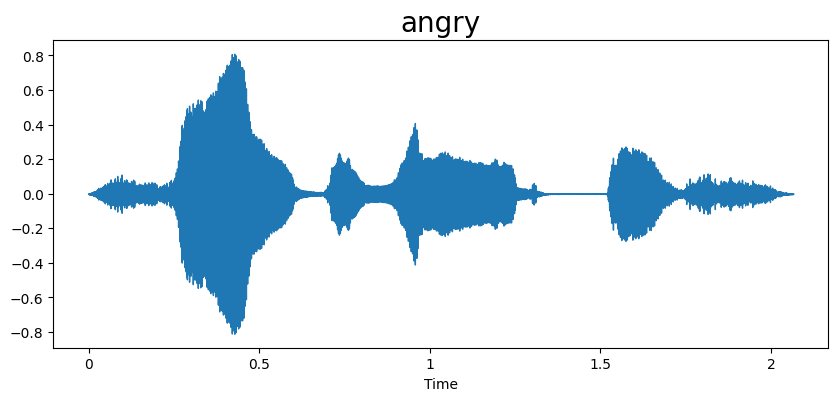

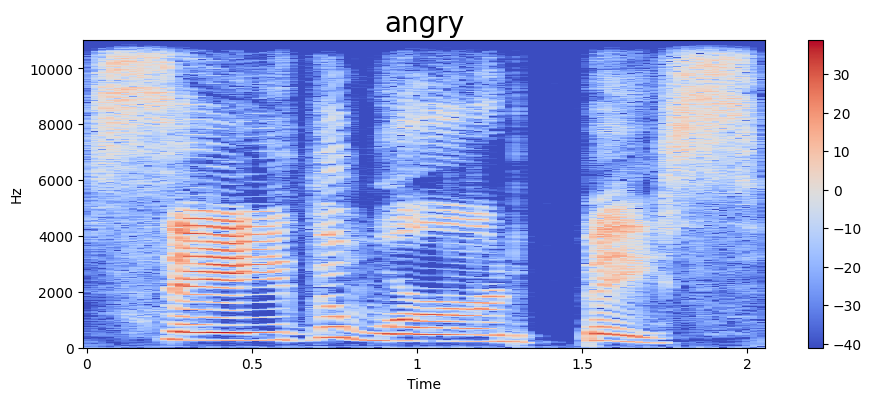

In [49]:
import numpy as np
emotion = 'angry'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**For Emotion = 'Sad'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

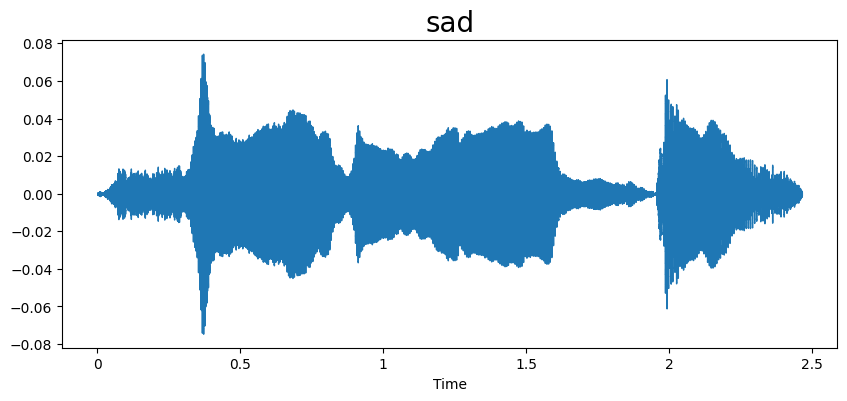

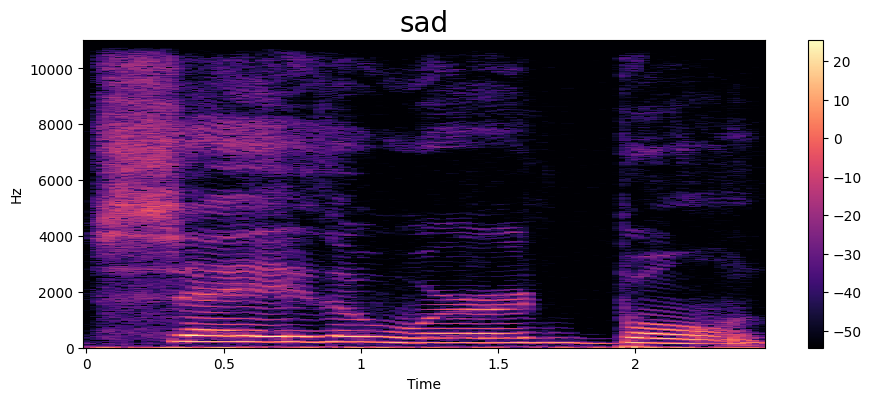

In [50]:
import numpy as np
emotion = 'sad'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**For Emotion = 'Disgust'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

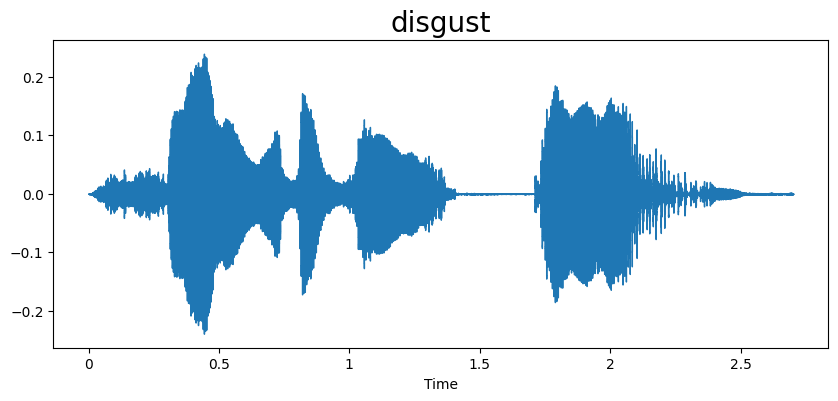

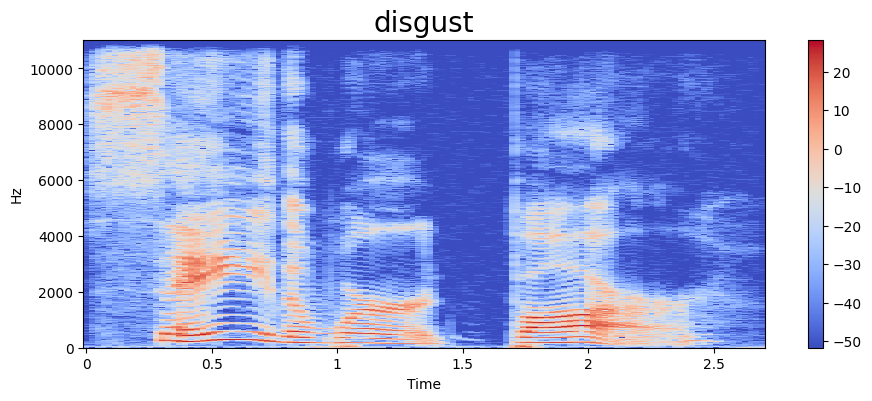

In [51]:
import numpy as np
emotion = 'disgust'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**For Emotion = 'Fear'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

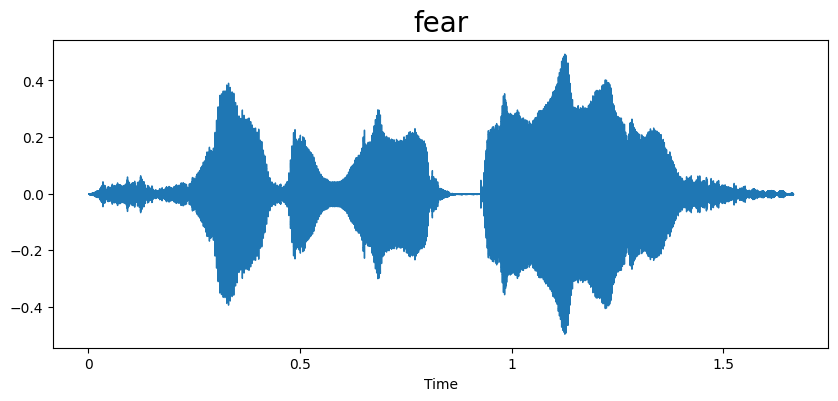

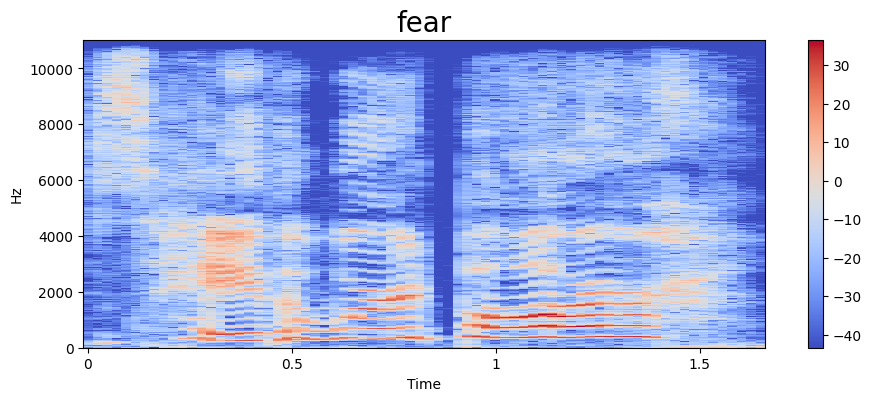

In [52]:
import numpy as np
emotion = 'fear'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**For Emotion = 'Surprise'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

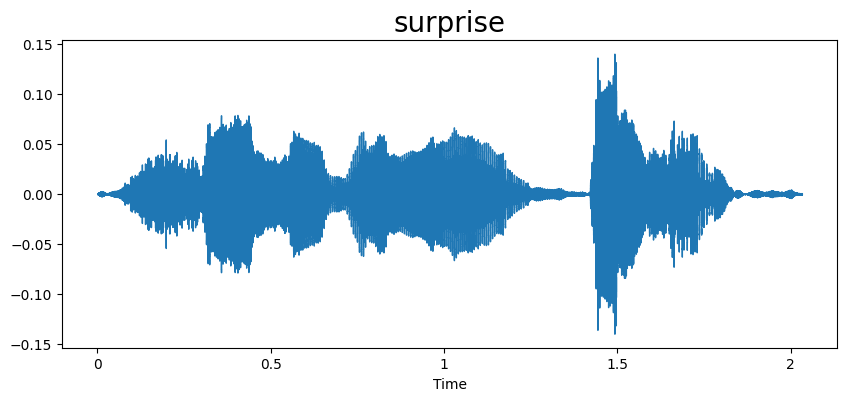

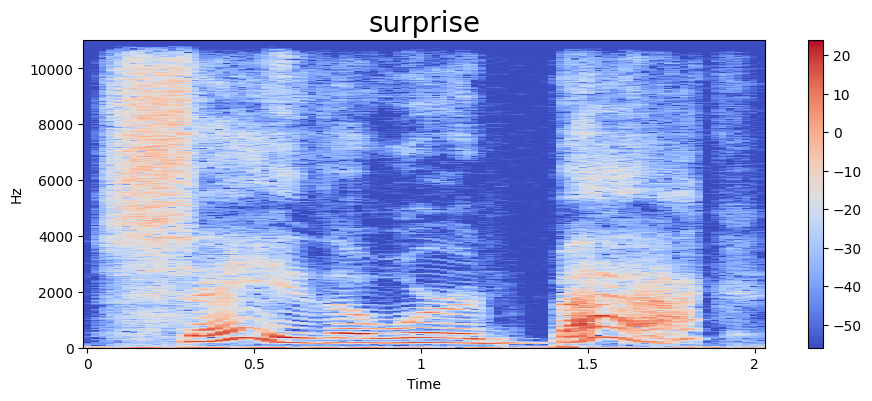

In [53]:
import numpy as np
emotion = 'surprise'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**For Emotion = 'Neutral'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

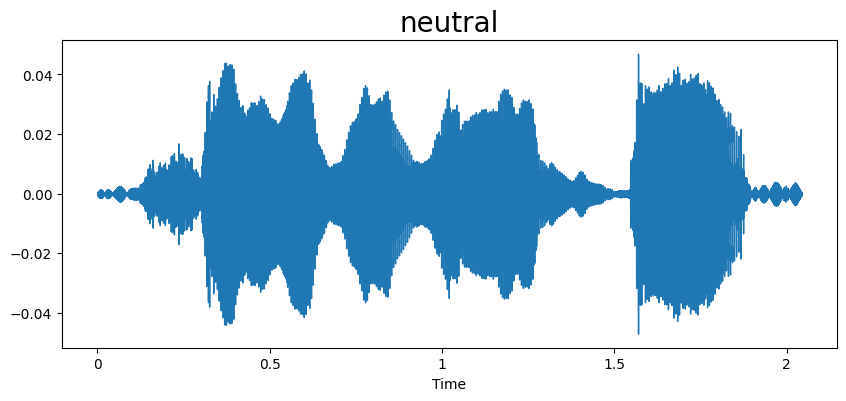

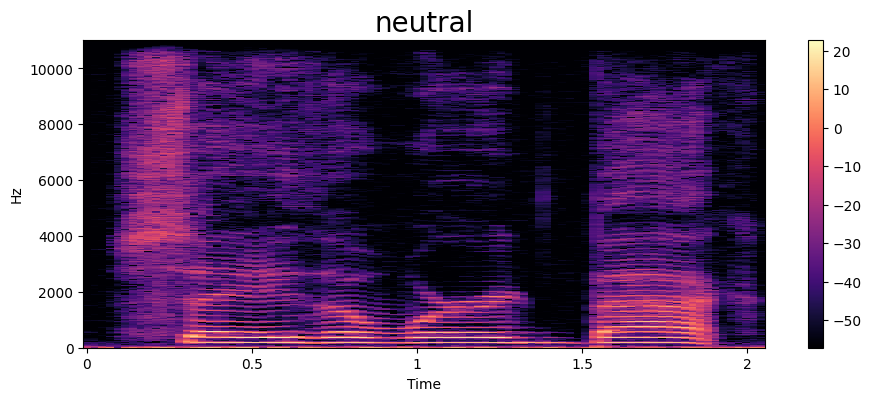

In [54]:
import numpy as np
emotion = 'neutral'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

####**1. Mel-Frequency Cepstral Coefficients (MFCCs):**


In [55]:
# compute MFCCs for each audio file
def extract_mfcc(filename):
    x, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [56]:
# Apply the extract_mfcc function to each row in the 'Speech' column
X_mfcc = df['Speech'].apply(lambda X: extract_mfcc(X))
X_mfcc

0       [-459.19495, 113.25883, 6.468314, -8.517831, 1...
1       [-437.6363, 74.104675, 15.492213, 13.882328, 1...
2       [-429.7678, 123.21714, 9.823561, -21.552526, 2...
3       [-442.97537, 110.74679, 6.8739104, -18.576502,...
4       [-436.7044, 111.79512, -4.3364267, -11.879581,...
                              ...                        
4523    [-216.68756, 95.71175, -8.5525875, 31.923103, ...
4524    [-233.38072, 93.9281, 3.7439828, 37.543762, -2...
4525    [-261.8816, 75.70982, -5.1104074, 33.90089, -1...
4526    [-235.4837, 89.97566, -5.799604, 34.713345, -1...
4527    [-197.90538, 113.72018, -4.986017, 29.73043, -...
Name: Speech, Length: 4528, dtype: object

In [57]:
# Display the resulting MFCCs
X_mfcc[0]

array([-4.5919495e+02,  1.1325883e+02,  6.4683142e+00, -8.5178308e+00,
        1.4831303e+01,  9.4798857e-01, -7.1947770e+00,  1.7235432e+00,
       -1.4757658e+01, -1.8636918e+00, -1.2069583e+01, -6.5550075e+00,
       -3.3464680e+00, -5.0495815e+00, -1.8815328e+00,  4.6955642e-01,
       -5.8209152e+00,  6.1258745e+00,  2.4967737e-01, -8.9119089e-01,
        9.7807544e-01,  5.2385821e+00, -3.4340818e+00,  3.1629972e+00,
       -2.5860622e+00,  2.3889143e+00, -4.7111969e+00,  1.7651416e+00,
       -2.2638738e+00,  2.5856149e+00, -3.2769272e+00,  2.2256258e-01,
       -1.1481861e+00, -1.6966074e+00,  1.1145566e+00,  2.7586679e+00,
        4.7629232e+00,  1.0610961e+01,  1.5159960e+01,  1.8821993e+01],
      dtype=float32)

In [58]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(4528, 40)

*  **Function to plot MFCC**
* The color variations in the plot represent the intensity or magnitude of the MFCC coefficients

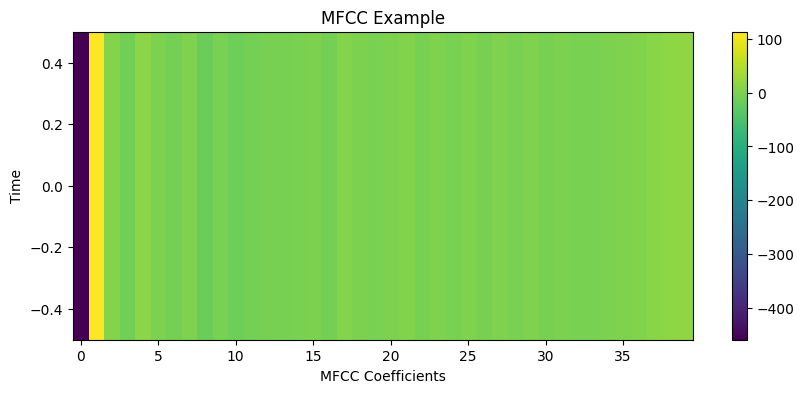

In [59]:
def plot_mfcc(mfcc, title="MFCC"):
    plt.figure(figsize=(10, 4))
    plt.imshow(mfcc.reshape(1, -1), cmap='viridis', origin='lower', aspect='auto')
    plt.title(title)
    plt.xlabel('MFCC Coefficients')
    plt.ylabel('Time')
    plt.colorbar()
    plt.show()
# Example for plotting MFCCs
mfcc_example = extract_mfcc(df['Speech'][0])
plot_mfcc(mfcc_example, title="MFCC Example")

####**2. Chroma Features**

In [60]:
def extract_chroma(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    return chroma
# Example usage for a single audio file
extract_chroma(df['Speech'][0])
# Applying Chroma feature extraction to all audio files in the dataframe
X_chroma = df['Speech'].apply(lambda x: extract_chroma(x))
X_chroma

0       [0.35424703, 0.26363897, 0.25903106, 0.3174023...
1       [0.2620749, 0.24723418, 0.26096952, 0.35427153...
2       [0.19145375, 0.1755194, 0.20608507, 0.29088587...
3       [0.4050839, 0.37434545, 0.36598, 0.37868014, 0...
4       [0.22475211, 0.24839658, 0.23900221, 0.2389832...
                              ...                        
4523    [0.19739564, 0.19312492, 0.22575994, 0.3582960...
4524    [0.30753854, 0.36768165, 0.3970416, 0.37690514...
4525    [0.49345136, 0.5011192, 0.4215711, 0.4121539, ...
4526    [0.31367636, 0.34017974, 0.4721351, 0.55547744...
4527    [0.29792863, 0.2673177, 0.30517134, 0.32974967...
Name: Speech, Length: 4528, dtype: object

In [61]:
# The length of the arrays is determined by the number of pitch classes
X_chroma[0]

array([0.35424703, 0.26363897, 0.25903106, 0.31740233, 0.44978103,
       0.5311231 , 0.36698392, 0.24585548, 0.22195038, 0.18356892,
       0.20669283, 0.29791358], dtype=float32)

In [62]:
X = [x for x in X_chroma]
X = np.array(X)
X.shape

(4528, 12)

*  **Function to plot Chroma features**
* The color intensity indicates the strength or presence of each Chroma coefficient at different time points.

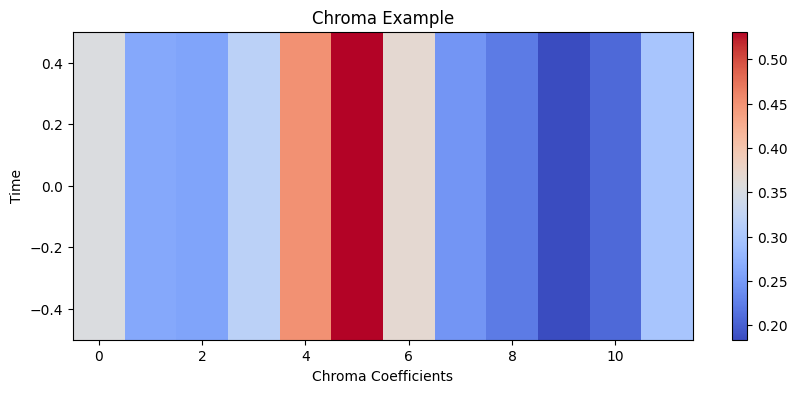

In [63]:
def plot_chroma(chroma, title="Chroma"):
    plt.figure(figsize=(10, 4))
    plt.imshow(chroma.reshape(1, -1), cmap='coolwarm', origin='lower', aspect='auto')
    plt.title(title)
    plt.xlabel('Chroma Coefficients')
    plt.ylabel('Time')
    plt.colorbar()
    plt.show()
# Example for plotting Chroma features
chroma_example = extract_chroma(df['Speech'][0])
plot_chroma(chroma_example, title="Chroma Example")

####**3. Zero Crossing Rate**

In [64]:
def extract_zcr(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T, axis=0)
    return zcr

# Applying ZCR feature extraction to all audio files in the dataframe
X_zcr = df['Speech'].apply(lambda x: extract_zcr(x))

In [65]:
X_zcr[0]

array([0.04661606])

In [66]:
X_zcr

0        [0.04661606297348485]
1         [0.0941433376736111]
2       [0.049017137096774195]
3       [0.060532513786764705]
4        [0.05219006147540984]
                 ...          
4523     [0.06615084134615384]
4524     [0.09548152043269231]
4525     [0.05445207868303571]
4526     [0.07137920673076924]
4527    [0.048580228365384615]
Name: Speech, Length: 4528, dtype: object

In [67]:
X = [x for x in X_zcr]
X = np.array(X)
X.shape

(4528, 1)

####**4. RMSE (Root Mean Square Error)**

Load the audio file, compute STFT for original signal, reconstruct the signal from STFT, compute RMSE b/w origianl and reconstructed signal.

In [68]:
def extract_rmse(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    D = librosa.stft(y)
    y_reconstructed = librosa.istft(D, length=len(y))
    rmse = np.sqrt(np.mean((y - y_reconstructed) ** 2))
    return rmse

In [69]:
# Example usage for a single audio file
rmse_0 = extract_rmse(df['Speech'][0])
print("RMSE for the example audio file:", rmse_0)
# Applying RMSE feature extraction to all audio files in the dataframe
X_rmse = df['Speech'].apply(extract_rmse)
print("RMSE features extracted from all audio files:\n", X_rmse)

RMSE for the example audio file: 1.0831309e-09
RMSE features extracted from all audio files:
 0       1.083131e-09
1       1.458301e-09
2       1.535488e-09
3       1.095640e-09
4       1.188314e-09
            ...     
4523    1.358905e-08
4524    1.279035e-08
4525    1.554736e-08
4526    1.322508e-08
4527    1.935792e-08
Name: Speech, Length: 4528, dtype: float32


In [70]:
# Concatenate all feature sets into a single DataFrame
X_combined = pd.concat([X_mfcc.apply(pd.Series),
                        X_chroma.apply(pd.Series),
                        X_rmse.apply(pd.Series),
                        X_zcr.apply(pd.Series)], axis=1)

# Display the combined DataFrame
print(X_combined)

              0           1          2          3          4          5   \
0    -459.194946  113.258827   6.468314  -8.517831  14.831303   0.947989   
1    -437.636292   74.104675  15.492213  13.882328  13.555792  -4.182434   
2    -429.767792  123.217140   9.823561 -21.552526   2.589235   3.703990   
3    -442.975372  110.746788   6.873910 -18.576502   9.705083   7.788685   
4    -436.704407  111.795120  -4.336427 -11.879581   9.158227   0.363304   
...          ...         ...        ...        ...        ...        ...   
4523 -216.687561   95.711746  -8.552588  31.923103 -24.637119 -18.501448   
4524 -233.380722   93.928101   3.743983  37.543762 -27.269266  -7.402802   
4525 -261.881592   75.709824  -5.110407  33.900890 -12.536843  -4.186358   
4526 -235.483704   89.975662  -5.799604  34.713345 -17.069786 -14.747795   
4527 -197.905380  113.720177  -4.986017  29.730431 -18.948271 -15.608767   

             6          7          8         9   ...        4         5   \
0     -7.19

In [71]:
X_combined.shape

(4528, 54)

In [72]:
## input split
X_combined = np.expand_dims(X_combined, -1)
X_combined.shape

(4528, 54, 1)

By combining different types of features, you may capture a more comprehensive representation of the underlying patterns in the data. Each set of features may highlight different aspects or characteristics of the data, and combining them can provide a richer feature space.

In [73]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['Label']])

In [74]:
y = y.toarray()

In [75]:
y.shape

(4528, 7)

In [134]:
# Get the categories (emotions) from the encoder
categories = enc.categories_[0]

# Print the mapping between indices and emotions
for i, emotion in enumerate(categories):
    print(f"Index {i} corresponds to emotion '{emotion}'")

Index 0 corresponds to emotion 'angry'
Index 1 corresponds to emotion 'disgust'
Index 2 corresponds to emotion 'fear'
Index 3 corresponds to emotion 'happy'
Index 4 corresponds to emotion 'neutral'
Index 5 corresponds to emotion 'sad'
Index 6 corresponds to emotion 'surprise'


In [76]:
len(X_combined), len(y)

(4528, 4528)

##### Split the data into training and testing sets

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

###**Deep Leaning Models Implementation**

####1. LSTM (Long Short Term Memory) :

In [78]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
LSTM_model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(54,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [79]:
# Train the model
history = LSTM_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
57/57 [==============================] - 18s 248ms/step - loss: 1.5870 - accuracy: 0.3404 - val_loss: 1.2820 - val_accuracy: 0.5210
Epoch 2/50
57/57 [==============================] - 14s 237ms/step - loss: 1.2473 - accuracy: 0.5420 - val_loss: 1.2129 - val_accuracy: 0.5574
Epoch 3/50
57/57 [==============================] - 14s 240ms/step - loss: 1.1319 - accuracy: 0.5900 - val_loss: 1.1145 - val_accuracy: 0.6115
Epoch 4/50
57/57 [==============================] - 15s 256ms/step - loss: 1.0758 - accuracy: 0.6096 - val_loss: 1.0799 - val_accuracy: 0.6347
Epoch 5/50
57/57 [==============================] - 16s 279ms/step - loss: 1.0387 - accuracy: 0.6380 - val_loss: 0.9662 - val_accuracy: 0.6766
Epoch 6/50
57/57 [==============================] - 14s 240ms/step - loss: 1.0265 - accuracy: 0.6466 - val_loss: 0.9078 - val_accuracy: 0.6799
Epoch 7/50
57/57 [==============================] - 14s 249ms/step - loss: 0.9611 - accuracy: 0.6601 - val_loss: 0.9330 - val_accuracy: 0.6634

Visual Representation of Train, Validation accuracies & losses

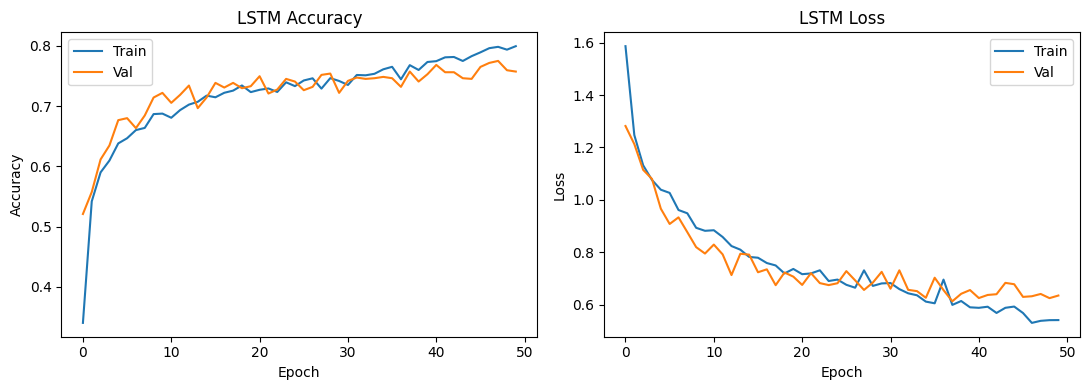

In [80]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.tight_layout()
plt.show()

Generating predictions on test data, Calculate Confusion Matrix & Plotting it.

29/29 [==============================] - 2s 45ms/step


<Figure size 600x600 with 0 Axes>

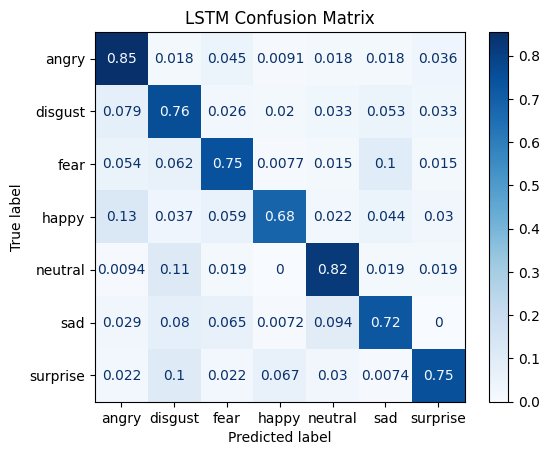

In [81]:
y_pred = LSTM_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels, normalize='true')

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=enc.categories_[0])
disp.plot(cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.show()

In [82]:
# Evaluate the model
test_loss, test_accuracy = LSTM_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

29/29 [==============================] - 2s 69ms/step - loss: 0.6344 - accuracy: 0.7572
Test Accuracy: 75.72%


In [83]:
from sklearn.metrics import precision_score, recall_score

# Predict labels for test data
y_pred = LSTM_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calculate precision and recall
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')

# Print precision and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


29/29 [==============================] - 2s 51ms/step
Precision: 0.7658
Recall: 0.7572


####2. CNN (Convolutional Neural Network ) :

In [84]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

CNN_Model = Sequential()
CNN_Model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(54, 1)))
CNN_Model.add(MaxPooling1D(pool_size=2))
CNN_Model.add(Conv1D(32, kernel_size=3, activation='relu'))
CNN_Model.add(MaxPooling1D(pool_size=2))
# Flatten the output for the dense layer
CNN_Model.add(Flatten())
CNN_Model.add(Dense(128, activation='relu'))
CNN_Model.add(Dropout(0.5))
CNN_Model.add(Dense(7, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
CNN_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_Model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 26, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 12, 32)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [85]:
# Train the model
history = CNN_Model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
57/57 [==============================] - 2s 15ms/step - loss: 2.2431 - accuracy: 0.3940 - val_loss: 1.0312 - val_accuracy: 0.6490
Epoch 2/50
57/57 [==============================] - 1s 11ms/step - loss: 1.0245 - accuracy: 0.6339 - val_loss: 0.8261 - val_accuracy: 0.7108
Epoch 3/50
57/57 [==============================] - 1s 11ms/step - loss: 0.8729 - accuracy: 0.6803 - val_loss: 0.7348 - val_accuracy: 0.7351
Epoch 4/50
57/57 [==============================] - 1s 11ms/step - loss: 0.8004 - accuracy: 0.7090 - val_loss: 0.6807 - val_accuracy: 0.7439
Epoch 5/50
57/57 [==============================] - 1s 12ms/step - loss: 0.7476 - accuracy: 0.7200 - val_loss: 0.6717 - val_accuracy: 0.7472
Epoch 6/50
57/57 [==============================] - 1s 11ms/step - loss: 0.7076 - accuracy: 0.7383 - val_loss: 0.6191 - val_accuracy: 0.7682
Epoch 7/50
57/57 [==============================] - 1s 11ms/step - loss: 0.6762 - accuracy: 0.7463 - val_loss: 0.6051 - val_accuracy: 0.7792
Epoch 8/50
57

Visual Representation of Train, Validation accuracies & losses

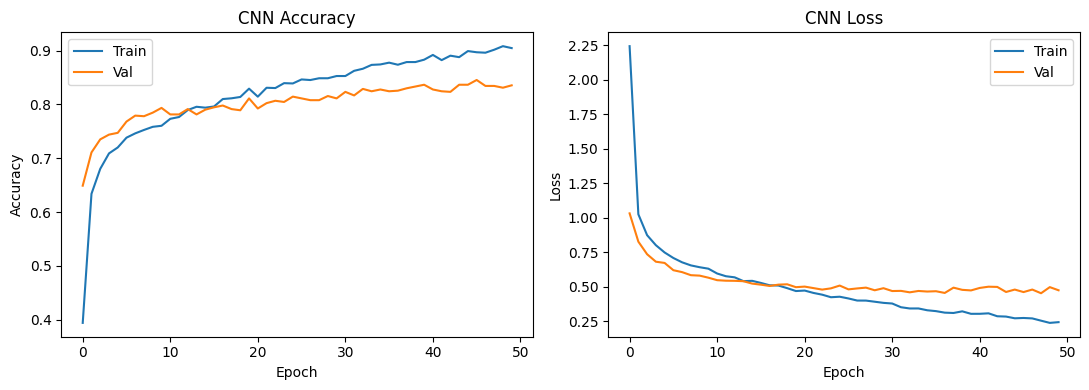

In [86]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.tight_layout()
plt.show()

Generating predictions on test data, Calculate Confusion Matrix & Plotting it.

29/29 [==============================] - 0s 5ms/step


<Figure size 600x600 with 0 Axes>

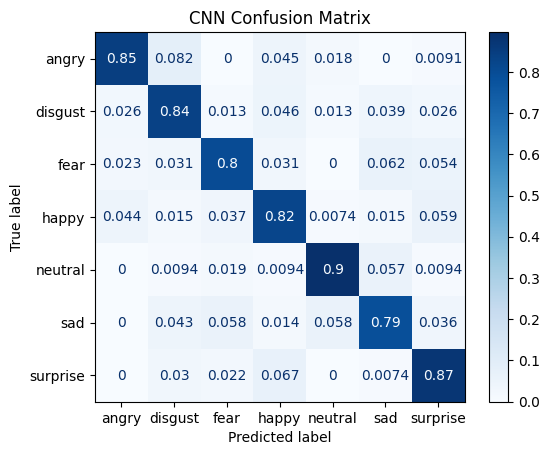

In [87]:
y_pred = CNN_Model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels, normalize='true')

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=enc.categories_[0])
disp.plot(cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.show()

In [88]:
# Evaluate the model
test_loss, test_accuracy = CNN_Model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

29/29 [==============================] - 0s 6ms/step - loss: 0.4736 - accuracy: 0.8355
Test Accuracy: 83.55%


In [89]:
from sklearn.metrics import precision_score, recall_score

# Predict labels for test data
y_pred = CNN_Model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calculate precision and recall
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')

# Print precision and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


29/29 [==============================] - 0s 5ms/step
Precision: 0.8359
Recall: 0.8355


####3. GRU (Gated Recurrent Unit) :

In [90]:
GRU_model = Sequential([
    GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(128),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
GRU_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
GRU_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 54, 128)           50304     
                                                                 
 dropout_4 (Dropout)         (None, 54, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [91]:
# Train the model
history = GRU_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
57/57 [==============================] - 19s 235ms/step - loss: 1.8761 - accuracy: 0.1861 - val_loss: 1.7737 - val_accuracy: 0.2748
Epoch 2/50
57/57 [==============================] - 12s 215ms/step - loss: 1.6601 - accuracy: 0.3192 - val_loss: 1.4926 - val_accuracy: 0.4238
Epoch 3/50
57/57 [==============================] - 11s 196ms/step - loss: 1.4843 - accuracy: 0.4017 - val_loss: 1.3304 - val_accuracy: 0.4923
Epoch 4/50
57/57 [==============================] - 13s 226ms/step - loss: 1.3656 - accuracy: 0.4796 - val_loss: 1.1867 - val_accuracy: 0.5618
Epoch 5/50
57/57 [==============================] - 13s 231ms/step - loss: 1.2811 - accuracy: 0.5041 - val_loss: 1.1623 - val_accuracy: 0.5618
Epoch 6/50
57/57 [==============================] - 13s 236ms/step - loss: 1.2288 - accuracy: 0.5290 - val_loss: 1.1022 - val_accuracy: 0.5949
Epoch 7/50
57/57 [==============================] - 13s 232ms/step - loss: 1.1342 - accuracy: 0.5629 - val_loss: 1.0328 - val_accuracy: 0.6247

Visual Representation of Train, Validation accuracies & losses

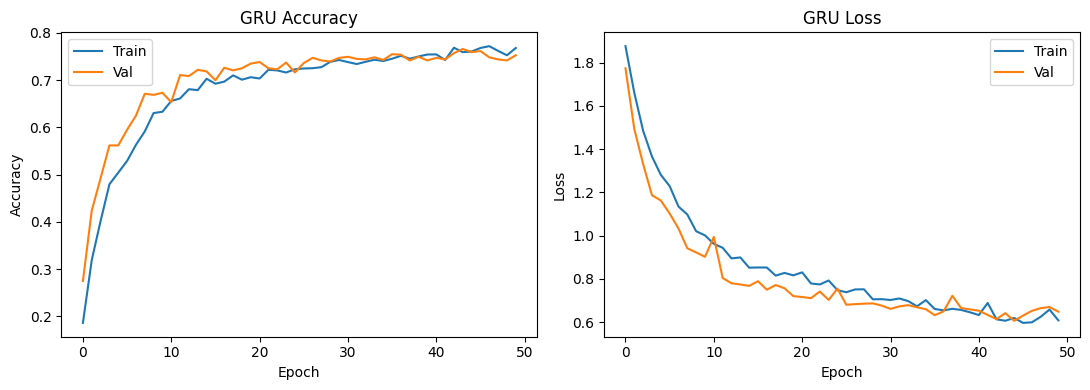

In [92]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('GRU Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.tight_layout()
plt.show()

Generating predictions on test data, Calculate Confusion Matrix & Plotting it.

29/29 [==============================] - 2s 29ms/step


<Figure size 600x600 with 0 Axes>

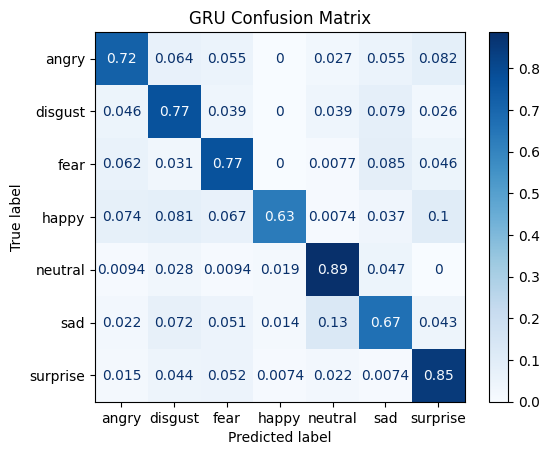

In [93]:
y_pred = GRU_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels, normalize='true')

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=enc.categories_[0])
disp.plot(cmap='Blues')
plt.title('GRU Confusion Matrix')
plt.show()

In [94]:
# Evaluate the model
test_loss, test_accuracy = GRU_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

29/29 [==============================] - 1s 30ms/step - loss: 0.6480 - accuracy: 0.7528
Test Accuracy: 75.28%


In [95]:
from sklearn.metrics import precision_score, recall_score

# Predict labels for test data
y_pred = GRU_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calculate precision and recall
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')

# Print precision and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


29/29 [==============================] - 1s 29ms/step
Precision: 0.7624
Recall: 0.7528


In [96]:
# Predicting on test data using LSTM_model
pred_test_lstm = LSTM_model.predict(X_test)
y_pred_lstm = enc.inverse_transform(pred_test_lstm)

# Predicting on test data using CNN_Model
pred_test_cnn = CNN_Model.predict(X_test)
y_pred_cnn = enc.inverse_transform(pred_test_cnn)

# Predicting on test data using GRU_model
pred_test_gru = GRU_model.predict(X_test)
y_pred_gru = enc.inverse_transform(pred_test_gru)

# Actual labels
y_test = enc.inverse_transform(y_test)

29/29 [==============================] - 1s 30ms/step


In [97]:
# Check for random predictions
randdf = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
randdf['Predicted Labels'] = y_pred_lstm.flatten()
randdf['Actual Labels'] = y_test.flatten()

randdf.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,angry,angry
2,neutral,neutral
3,disgust,disgust
4,happy,fear
5,surprise,disgust
6,sad,fear
7,happy,happy
8,neutral,neutral
9,happy,happy


In [98]:
randdf

,Predicted Labels,Actual Labels
0,angry,angry
1,angry,angry
2,neutral,neutral
3,disgust,disgust
4,happy,fear
...,...,...
901,disgust,sad
902,disgust,disgust
903,angry,neutral
904,fear,happy


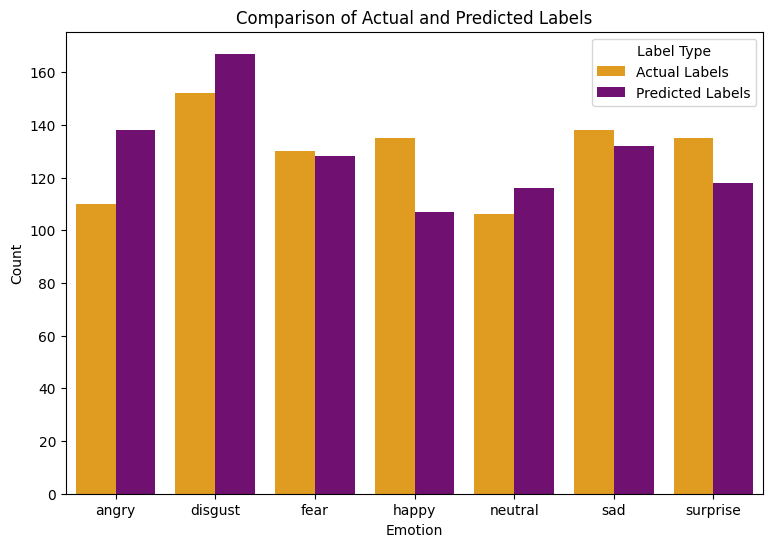

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data for both actual and predicted labels into a single DataFrame
combined_df = pd.concat([randdf.groupby('Actual Labels').size().rename('Actual Labels'),
                         randdf.groupby('Predicted Labels').size().rename('Predicted Labels')],
                        axis=1)

# Melt the DataFrame to transform it into the appropriate format for seaborn's countplot
melted_df = combined_df.reset_index().melt(id_vars='index', var_name='Label Type', value_name='Count')

# Plot the grouped bar plot with contrasting colors and vertical orientation
plt.figure(figsize=(9,6))
sns.barplot(data=melted_df, x='index', y='Count', hue='Label Type', palette=['orange', 'purple'], orient='v')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Labels')
plt.gca().spines[['top', 'right']].set_visible(True)
plt.legend(title='Label Type')
plt.show()


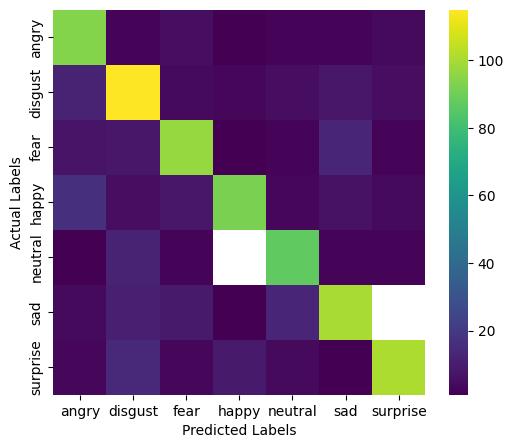

In [100]:
# @title Predicted Labels vs Actual Labels

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(6,5))
df_2dhist = pd.DataFrame({
    x_label: grp['Actual Labels'].value_counts()
    for x_label, grp in randdf.groupby('Predicted Labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Predicted Labels')
_ = plt.ylabel('Actual Labels')

In [101]:
# Check for random predictions
randdf1 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
randdf1['Predicted Labels'] = y_pred_cnn.flatten()
randdf1['Actual Labels'] = y_test.flatten()
randdf1.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,angry,angry
2,neutral,neutral
3,disgust,disgust
4,fear,fear
5,disgust,disgust
6,fear,fear
7,happy,happy
8,neutral,neutral
9,happy,happy


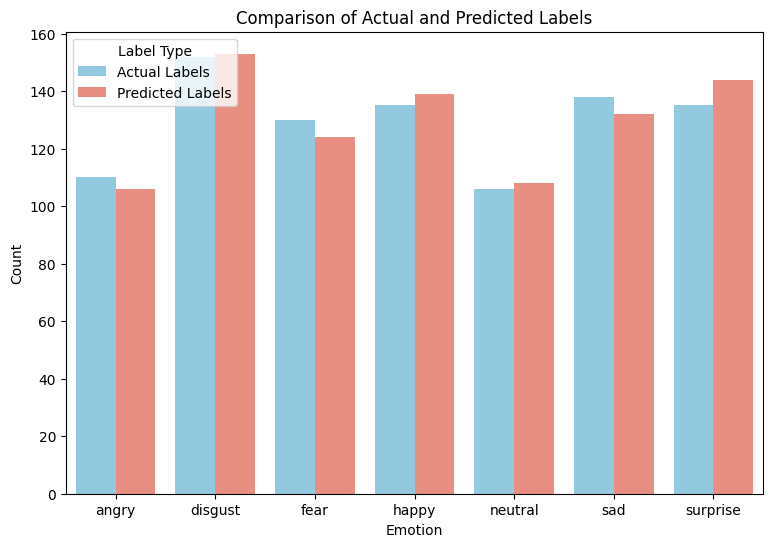

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data for both actual and predicted labels into a single DataFrame
combined_df = pd.concat([randdf1.groupby('Actual Labels').size().rename('Actual Labels'),
                         randdf1.groupby('Predicted Labels').size().rename('Predicted Labels')],
                        axis=1)

# Melt the DataFrame to transform it into the appropriate format for seaborn's countplot
melted_df = combined_df.reset_index().melt(id_vars='index', var_name='Label Type', value_name='Count')

# Plot the grouped bar plot with contrasting colors and vertical orientation
plt.figure(figsize=(9, 6))
sns.barplot(data=melted_df, x='index', y='Count', hue='Label Type', palette=['skyblue', 'salmon'], orient='v')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Labels')
plt.gca().spines[['top', 'right']].set_visible(True)
plt.legend(title='Label Type')
plt.show()


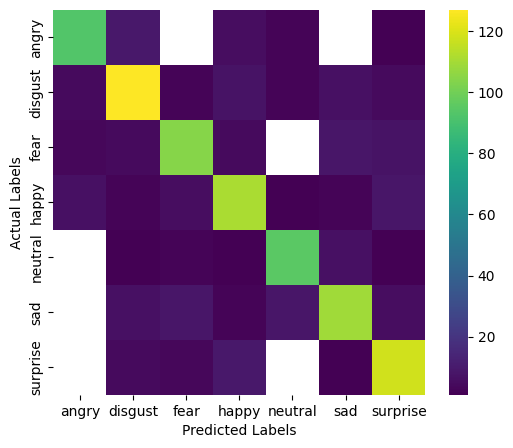

In [103]:
# @title Predicted Labels vs Actual Labels

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(6,5))
df_2dhist = pd.DataFrame({
    x_label: grp['Actual Labels'].value_counts()
    for x_label, grp in randdf1.groupby('Predicted Labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Predicted Labels')
_ = plt.ylabel('Actual Labels')

In [104]:
# Check for random predictions
randdf2 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
randdf2['Predicted Labels'] = y_pred_gru.flatten()
randdf2['Actual Labels'] = y_test.flatten()
randdf2.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,angry,angry
2,neutral,neutral
3,disgust,disgust
4,fear,fear
5,disgust,disgust
6,surprise,fear
7,happy,happy
8,neutral,neutral
9,happy,happy


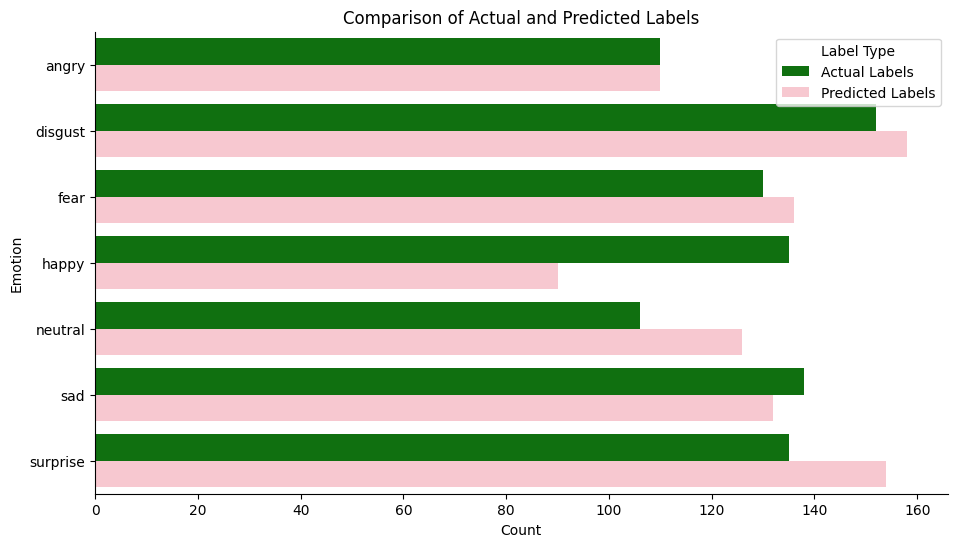

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data for both actual and predicted labels into a single DataFrame
combined_df = pd.concat([randdf2.groupby('Actual Labels').size().rename('Actual Labels'),
                         randdf2.groupby('Predicted Labels').size().rename('Predicted Labels')],
                        axis=1)

# Melt the DataFrame to transform it into the appropriate format for seaborn's countplot
melted_df = combined_df.reset_index().melt(id_vars='index', var_name='Label Type', value_name='Count')

# Plot the grouped bar plot with custom colors
plt.figure(figsize=(11, 6))
sns.barplot(data=melted_df, x='Count', y='index', hue='Label Type', palette=['green', 'pink'])
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.title('Comparison of Actual and Predicted Labels')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


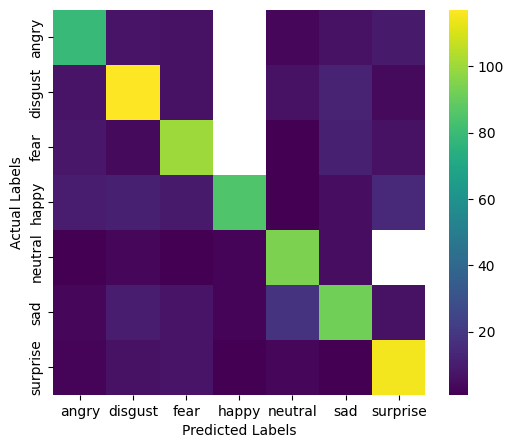

In [106]:
# @title Predicted Labels vs Actual Labels

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(6,5))
df_2dhist = pd.DataFrame({
    x_label: grp['Actual Labels'].value_counts()
    for x_label, grp in randdf2.groupby('Predicted Labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Predicted Labels')
_ = plt.ylabel('Actual Labels')

In [107]:
import pandas as pd

# Create a dictionary with the model names and corresponding metrics
metrics_dict = {
    'Model': ['LSTM', 'CNN', 'GRU'],
    'Loss': [0.6666, 0.4336, 0.6689],
    'Accuracy': [0.7826, 0.8675, 0.7682],
    'Precision': [0.7873, 0.8699, 0.7746],
    'Recall': [0.7826, 0.8675, 0.7682]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Set the 'Model' column as the index
metrics_df.set_index('Model', inplace=True)

# Display the DataFrame
print("Metrics for Each Model:")
metrics_df


Metrics for Each Model:


,Loss,Accuracy,Precision,Recall
Model,,,,
LSTM,0.6666,0.7826,0.7873,0.7826
CNN,0.4336,0.8675,0.8699,0.8675
GRU,0.6689,0.7682,0.7746,0.7682


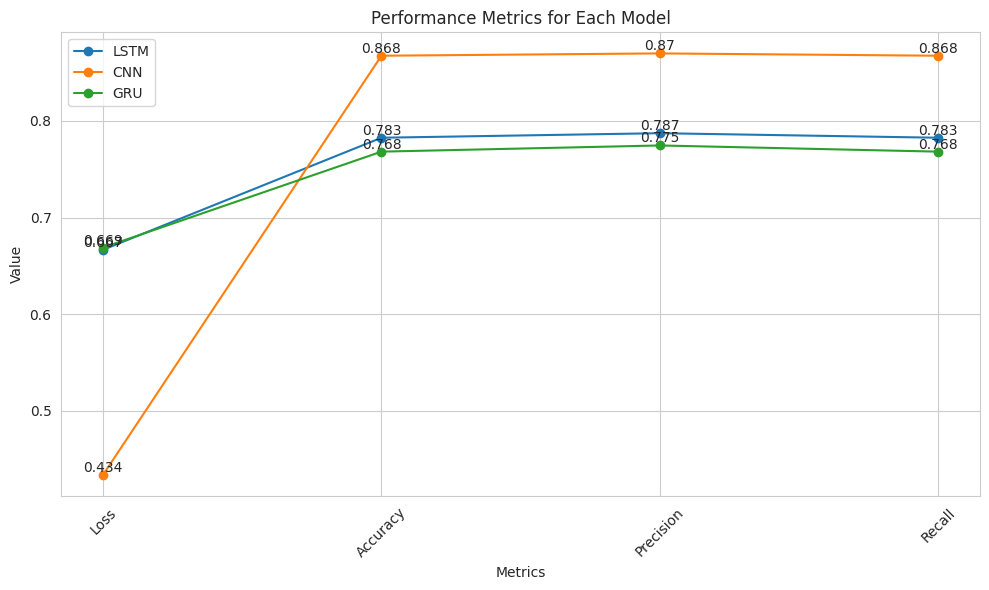

Saving model

In [122]:
# define dependency
from tensorflow.keras.models import load_model

# load model
model = load_model('/content/CNN_model.h5')

# check model info
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 26, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 12, 32)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [124]:
# compute MFCCs for each audio file
def extract_mfcc(filename):
    x, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

def extract_chroma(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    return chroma

def extract_zcr(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T, axis=0)
    return zcr

def extract_rmse(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    D = librosa.stft(y)
    y_reconstructed = librosa.istft(D, length=len(y))
    rmse = np.sqrt(np.mean((y - y_reconstructed) ** 2))
    return rmse

In [125]:
# Define file path
file_path = '/content/drive/MyDrive/SAVEE/DC/a01.wav'

# Extract features
mfcc = extract_mfcc(file_path)
chroma = extract_chroma(file_path)
zcr = extract_zcr(file_path)
rmse = np.array([extract_rmse(file_path)])

In [126]:
# Create DataFrames for each feature
mfcc = pd.DataFrame(mfcc.reshape(1, -1))  # Reshape to 1 row and as many columns as needed
chroma = pd.DataFrame(chroma.reshape(1, -1))
zcr = pd.DataFrame(zcr.reshape(1, -1))
rmse = pd.DataFrame(rmse.reshape(1, -1))

# Concatenate all feature sets into a single DataFrame
combined = pd.concat([mfcc, chroma, zcr, rmse], axis=1)

# Display the combined DataFrame
print(combined)

           0           1          2          3          4        5   \
0 -286.431793  128.344833  10.662353  33.634502  10.786772 -6.46211   

          6         7         8          9   ...        4         5   \
0 -31.444633 -5.099461 -2.576629 -15.035132  ...  0.356604  0.388547   

         6         7         8         9         10       11        0   \
0  0.396916  0.354292  0.462946  0.451689  0.308448  0.26456  0.033421   

             0   
0  9.936436e-09  

[1 rows x 54 columns]
